In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
#data = sns.load_dataset("titanic")
# To load inbuilt dataset

In [3]:
data = pd.read_csv(r"D:\Pratap DS\Python-PG\Titanic DS\titanic-training-data.csv")

Step 1 - calling pandas library for reading the dataset

Step 2 - calling read_csv function to import external csv file

Step 3 - r means raw string for format syncing purpose

Step 4 - paste the path of csv sheet

In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#dropping unimportant columns from the dataset - PassengerID, Name, Ticket, Fare
data.drop(["PassengerId", "Name", "Ticket", "Fare"],axis=1,inplace=True)
#axis=1 means column names and axis=0 is rows
#inplace=True is permanent deletion

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [7]:
data.shape

(891, 8)

In [8]:
# To find out the distinct values of Pclass column
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
#homework - Find out distinct values of cabin and embarked columns

In [10]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

To extract a column of the dataset, there are two ways as below.

In [12]:
data.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
#to check missing values in every column in a dataset - mandatory for all datasets

In [15]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


<Axes: xlabel='Age'>

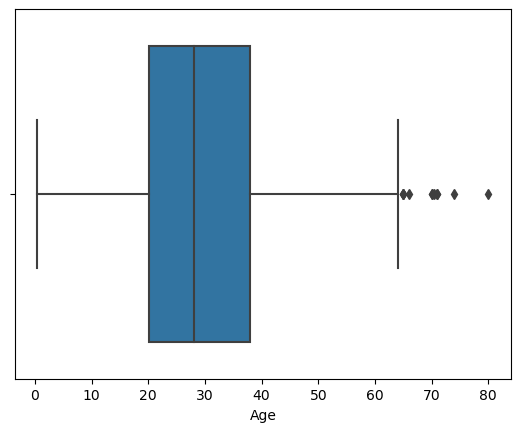

In [17]:
sns.boxplot(x="Age",data=data)
#distribution of "Age" to find out outliers.
#This is a positively skewed distribution with a handful of outliers for age towards the higher side, meaning that there are more old people present in the ship.
#We are unable to compute missing values of age with the help of mean, because we have outliers in the age distribution and mean is affected by outliers.
#Hence, we can do missing value imputation using median in this case.

<Axes: xlabel='Survived', ylabel='Age'>

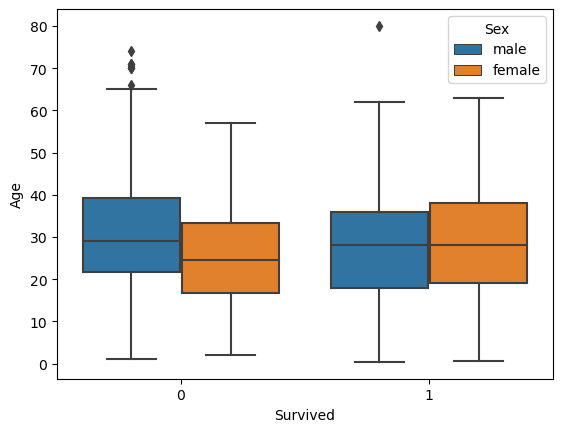

In [18]:
sns.boxplot(y="Age",x="Survived",hue="Sex",data=data)

In [19]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [20]:
data.Parch.value_counts()
#How can anyone travel with Parents more than 2?

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: xlabel='Parch', ylabel='Sex'>

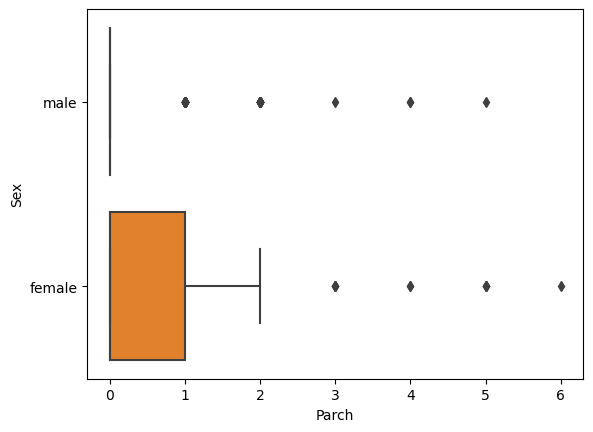

In [21]:
sns.boxplot(x="Parch",y="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

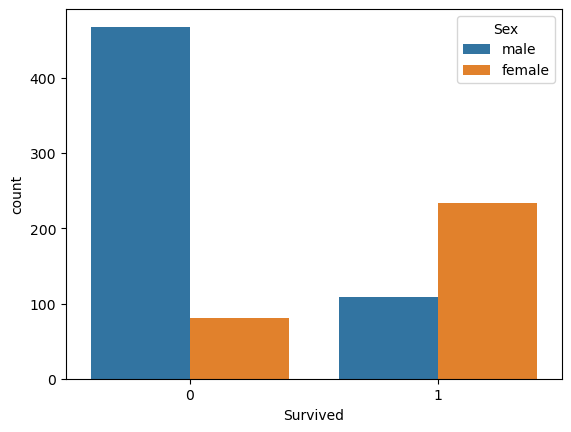

In [22]:
sns.countplot(x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

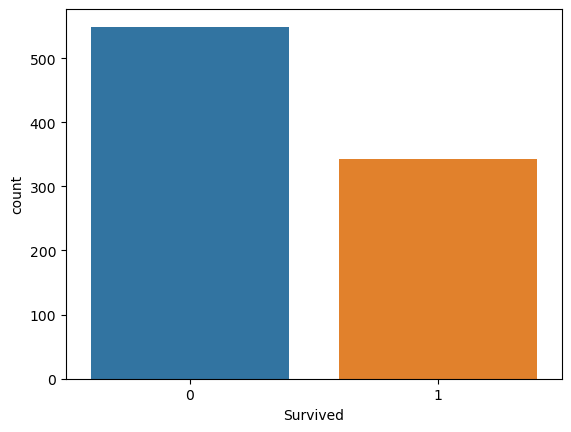

In [23]:
sns.countplot(x="Survived",data=data)
#to check whether the categories of the target veriable are equivalent or not (in order to check for data balancing)
#dataset appears to be imbalanced, we would have to balance it with the help of "smote" method

<Axes: xlabel='Parch', ylabel='count'>

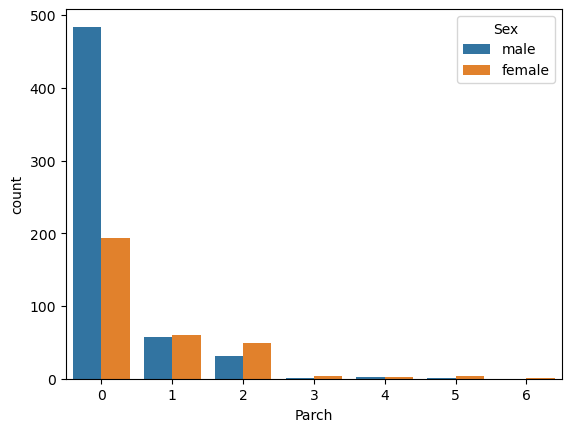

In [25]:
sns.countplot(x="Parch",hue="Sex",data=data)

Two categorical variables - We used the countplot which gives the best representation.

Two continuous variables - We can use scatter plot.

One continuous and one categorical - Box plot or vertical bar chart (continuous variable in y axis) is good for it.

<Axes: xlabel='Age', ylabel='Sex'>

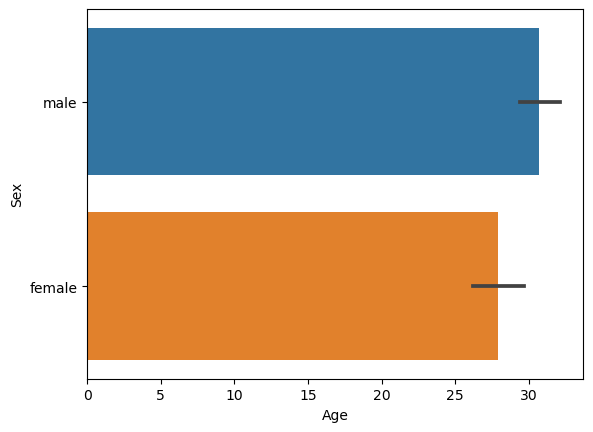

In [26]:
sns.barplot(x="Age",y="Sex",data=data)

<Axes: xlabel='Survived', ylabel='Age'>

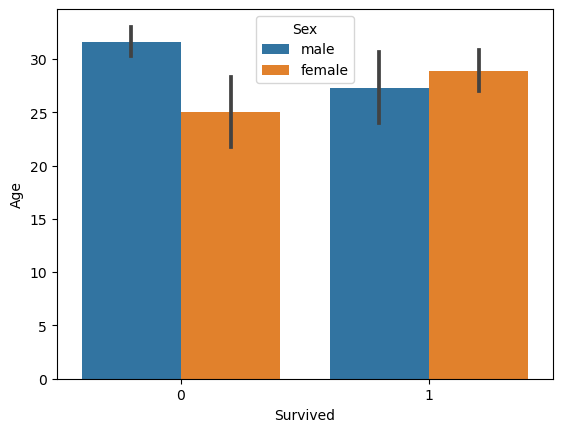

In [27]:
sns.barplot(y="Age",x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

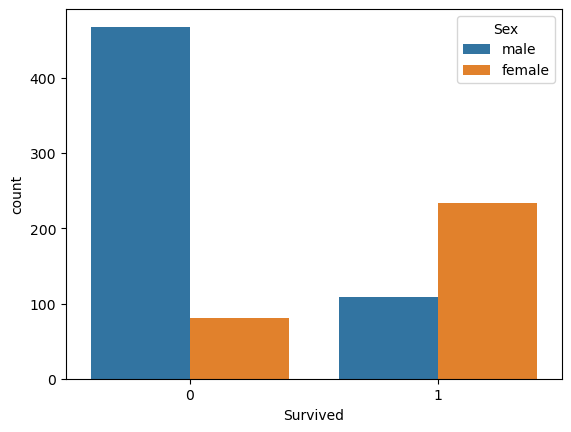

In [28]:
sns.countplot(x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='Age'>

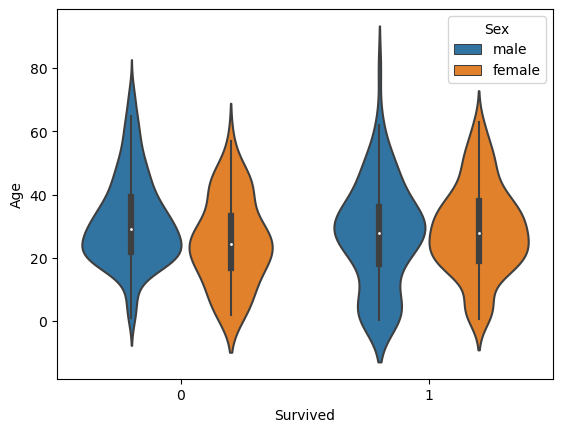

In [29]:
sns.violinplot(x="Survived",y="Age",hue="Sex",data=data)
# One categorical and one continuous variable
#Categorical variable should be x axis, otherwise there will be too many violins formed, making it difficult to interpret.

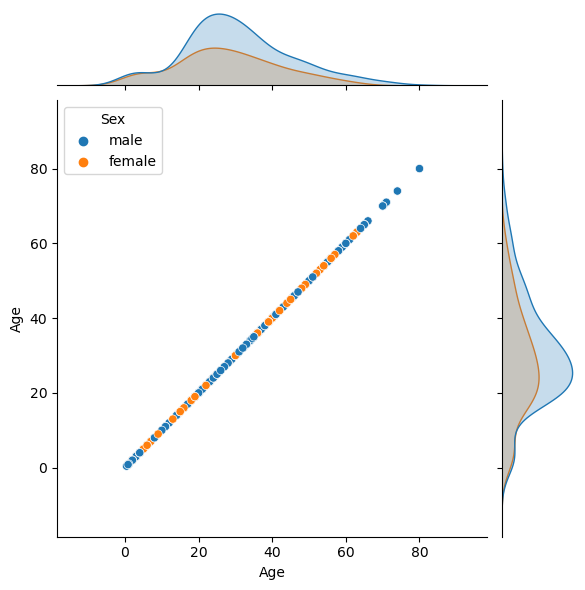

In [30]:
sns.jointplot(x="Age",y="Age",hue="Sex",data=data)

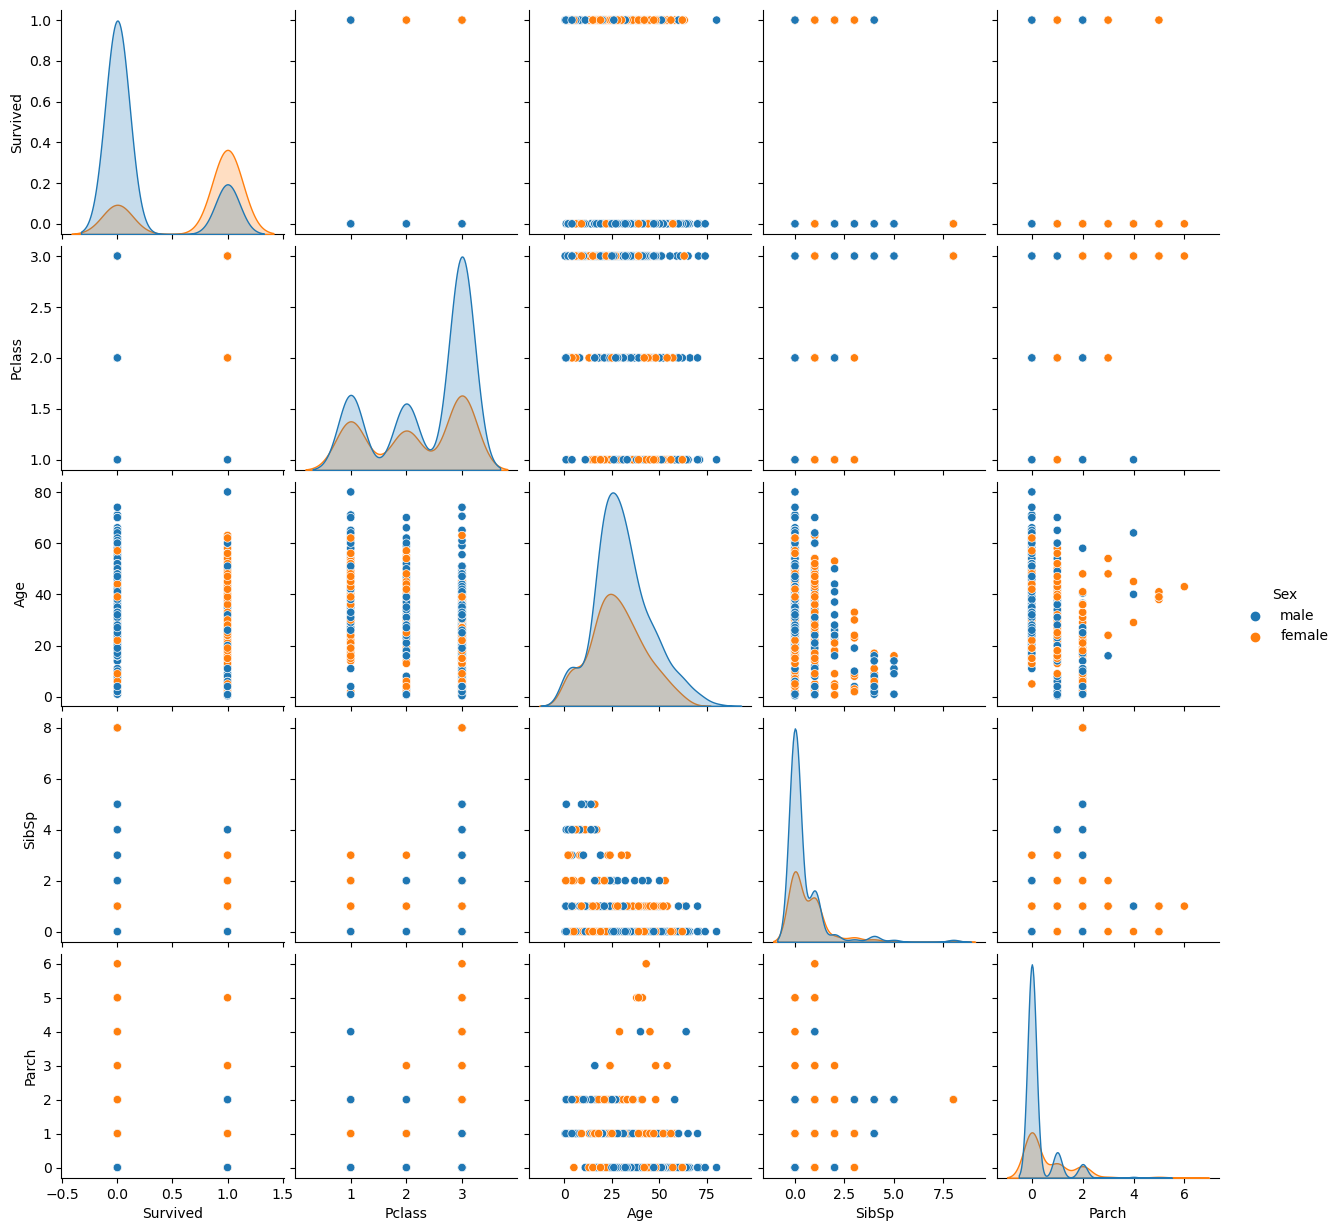

In [31]:
#pair plot
sns.pairplot(data,hue="Sex")

C:\Users\prata\AppData\Local\Temp\ipykernel_13296\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

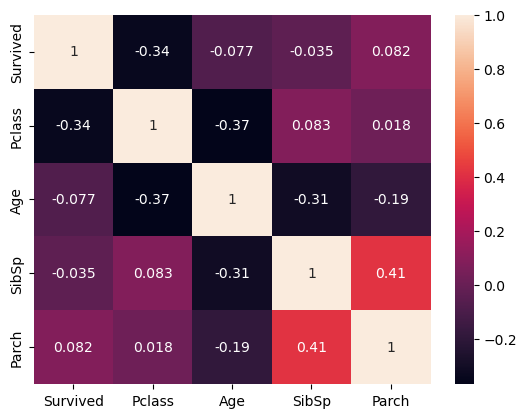

In [32]:
sns.heatmap(data.corr(),annot=True)

In [33]:
data.corr()

C:\Users\prata\AppData\Local\Temp\ipykernel_13296\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


Now we are computing missing values of "Age" column. For that we want to observe which is the correlated column to "Age".

In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


To fill the missing values of "Age" column, we want to check which columns are related to "Age" (continuous), for which possible columns are Parch (categorical) and SibSp (categorical). Now we want to check the visualisation analysis of Parch vs Age and SibSp Vs Age. For that we can will use box plot or bar chart visualisation.

<Axes: xlabel='Parch', ylabel='Age'>

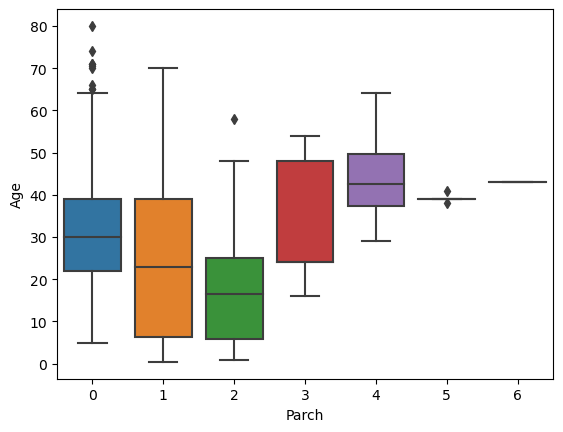

In [35]:
sns.boxplot(x="Parch",y="Age",data=data)

Median age for Parch=0 is 30.

parch=1 is 21

parch=2 is 17

parch=3 - median to find out

parch 4 is 42

parch 5 and 6 - median to find out

<Axes: xlabel='SibSp', ylabel='Age'>

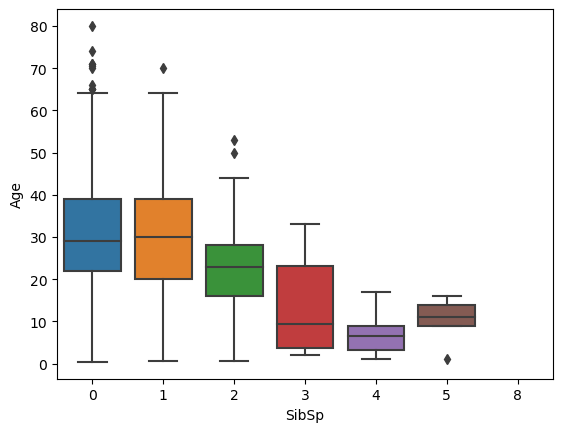

In [36]:
sns.boxplot(x="SibSp",y="Age",data=data)

Median age for SibSp=0 is 29.

SibSp=1 is 30

SibSp=2 is 24

SibSp=3 is 9

SibSp4 is 5

SibSp 5 is 10

Using Parch to find put the missing values of "Age" column. For that, we will use "groupby" function that allows the data to split in different groups based on specified criteria and perform calculations separately. Here, we will groupby the Parch column in the data by Median, on each newly created group (for Parch=0 it will create 1 group and likewise for other Parch values and gives the median for each group)

In [37]:
parch1=data.groupby(data["Parch"])
parch1.median()

C:\Users\prata\AppData\Local\Temp\ipykernel_13296\2594807159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parch1.median()


,Survived,Pclass,Age,SibSp
Parch,,,,
0,0.0,3.0,30.0,0.0
1,1.0,2.0,23.0,1.0
2,0.5,3.0,16.5,1.0
3,1.0,3.0,24.0,1.0
4,0.0,3.0,42.5,1.0
5,0.0,3.0,39.0,1.0
6,0.0,3.0,43.0,1.0


In [38]:
# We will have to prepare a function which will replace the missing values of age with the respective median_age values for parch =0, 1 ,2, and so on
def age1(col):
    Age=col[0]
    Parch=col[1]
    if pd.isnull(Age):
        if Parch == 0:
            return 30
        elif Parch==1:
            return 23
        elif Parch==2:
            return 17
        elif Parch==3:
            return 24
        elif Parch==4:
            return 43
        elif Parch==5:
            return 39
        else:
            return 43
    else:
        return Age

In [39]:
# We will apply the function called "Age1" to the columns Age and Parch in the dataset and assign the result to the Age column.
data["Age"]=data[["Age","Parch"]].apply(age1,axis=1)

In [40]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [41]:
data.shape

(891, 8)

We now will be computing missing values for column "Cabin". Since the column is not numerical, mean/median or any other statistical descriptors can't be used. Mode cannot be found either since majority of the values are missing values. We cannot even drop the column because it might be related to the target variable and we cannot drop the missing records as well because we will tend to lose too much of the data records, which in turn might affect data analysis. Hence we will replace missing values of Cabin column with "Unknown".

In [42]:
#While doing .fillna(), we should apply the direct column from the dataset with the function .fillna() and not save that to avoid syncing issues.
data["Cabin"].fillna("Unknown",inplace=True)

In [43]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    2
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     891 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [45]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,Unknown,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,Unknown,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,Unknown,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Unknown,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,17.0,1,2,Unknown,S
889,1,1,male,26.0,0,0,C148,C


In [46]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,Unknown,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,Unknown,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,Unknown,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Unknown,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,17.0,1,2,Unknown,S
889,1,1,male,26.0,0,0,C148,C


In [47]:
data.Cabin.value_counts()

Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [48]:
data.dropna(subset=["Embarked"],inplace=True)

In [49]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
dtype: int64

In [50]:
#Find the number of distinct categories within the Embarked column.
unique_eb=data["Embarked"].unique()

In [51]:
unique_eb

array(['S', 'C', 'Q'], dtype=object)

In [52]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,Unknown,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,Unknown,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,Unknown,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Unknown,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,17.0,1,2,Unknown,S
889,1,1,male,26.0,0,0,C148,C


In [54]:
#Now we will proceed with encoding to convert the string values into numerical - Sex - Label, Cabin - One-hot, Embarked - One-hot/Label

In [55]:
data.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [56]:
# We can club all the A's, B's...G's to have acceptable number of categories within the column Cabin.
data.Cabin.value_counts()

Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [57]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
# Applying Label Encoding to Sex column
# Step 1 - Importing the necessary libraries
from sklearn.preprocessing import LabelEncoder

# Step 2 - We are saving the instance of label encoder class

le=LabelEncoder()

# Step 3 - Extracting the Sex column from the dataset "data"

gender=data["Sex"]

# Step 4 - Apply fit_transform() method of the LabelEncoder instance to the Sex column to encode the values

gender1=le.fit_transform(gender)
gender1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [59]:
genderdf=pd.DataFrame(gender1,columns=["Gender"])
# Method to convert Array to DataFrame

In [60]:
genderdf

,Gender
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [61]:
# Applying one-hot encoding to Cabin column

cabin_enc=pd.get_dummies(data["Cabin"],prefix="Cabin")
cabin_enc

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Applying one-hot encoding to Embarked column

from sklearn.preprocessing import OneHotEncoder

emb=data["Embarked"]

emb1=le.fit_transform(emb)
emb1

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [63]:
emb1=emb1.reshape(-1,1)

binary=OneHotEncoder(categories="auto")

column=binary.fit_transform(emb1)


In [64]:
column

<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [65]:
column=column.toarray()

In [66]:
embdf=pd.DataFrame(column,columns=["C","S","Q"])
# Method to convert Array to DataFrame
embdf

,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [67]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
dtype: int64

In [68]:
# Adding embdf, genderdf and cabin_enc to the main data frame "data" with the help of concat()
data2=pd.concat([data,embdf,genderdf,cabin_enc],axis=1)

In [69]:
embdf

,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [70]:
genderdf

,Gender
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [71]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,Unknown,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,Unknown,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,Unknown,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Unknown,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,17.0,1,2,Unknown,S
889,1,1,male,26.0,0,0,C148,C


In [72]:
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,C,S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0.0,3.0,male,22.0,1.0,0.0,Unknown,S,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,female,38.0,1.0,0.0,C85,C,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,female,26.0,0.0,0.0,Unknown,S,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,female,35.0,1.0,0.0,C123,S,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,male,35.0,0.0,0.0,Unknown,S,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,3.0,female,17.0,1.0,2.0,Unknown,S,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,1.0,male,26.0,0.0,0.0,C148,C,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890,0.0,3.0,male,32.0,0.0,0.0,Unknown,Q,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data2.isnull().sum()

Survived         2
Pclass           2
Sex              2
Age              2
SibSp            2
                ..
Cabin_F38        2
Cabin_F4         2
Cabin_G6         2
Cabin_T          2
Cabin_Unknown    2
Length: 159, dtype: int64

In [74]:
data2.dropna(inplace=True)

In [75]:
data2.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
                ..
Cabin_F38        0
Cabin_F4         0
Cabin_G6         0
Cabin_T          0
Cabin_Unknown    0
Length: 159, dtype: int64

In [76]:
data2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked', 'C', 'S',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Cabin_Unknown'],
      dtype='object', length=159)

In [77]:
# Now we will drop "Sex", "Embarked", "Cabin", any one of "C, S or Q" and anyone of Cabin encoded columns "Cabin_T"

In [78]:
data2.drop(["Sex", "Embarked", "Cabin", "Q", "Cabin_T"],axis=1,inplace=True)
data2

,Survived,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
0,0.0,3.0,22.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,3.0,39.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Now that the dataset is model ready, we will be dividing the data into x (feature columns) and y (target variable) and doing train-test split.
x=data2.drop("Survived",axis=1)
x

,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
0,3.0,22.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,3.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,3.0,39.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
y=data2["Survived"]
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
Name: Survived, Length: 887, dtype: float64

In [82]:
# We will balance the dataset when we learn the applicaiton of "smote"

# Doing Train-test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=91)
# random_state = 91 means setting random state to a specific value to help ensure the reproducibility of the results. random_state = 42 is another example.

In [83]:
x_train

,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
767,3.0,30.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,3.0,24.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
835,1.0,39.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
866,2.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,2.0,33.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,3.0,17.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,2.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876,3.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
687,3.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
x_test

,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
811,3.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
392,3.0,28.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
691,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
880,2.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
402,3.0,21.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,3.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
714,2.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,2.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504,1.0,16.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
y_train

767    0.0
394    1.0
835    1.0
866    1.0
239    0.0
      ... 
863    0.0
211    1.0
876    0.0
687    0.0
179    0.0
Name: Survived, Length: 709, dtype: float64

In [86]:
y_test

811    0.0
392    0.0
691    1.0
880    1.0
402    0.0
      ... 
704    0.0
714    0.0
99     0.0
504    1.0
560    0.0
Name: Survived, Length: 178, dtype: float64

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr=LogisticRegression()
# Saving the instance of LogisticRegression

In [89]:
lr.fit(x_train,y_train)

C:\Users\prata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
lr_pred=lr.predict(x_test)

In [91]:
lr_pred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0.])

In [92]:
confusionmatrix=pd.crosstab(y_test,lr_pred,rownames=["actual"],colnames=["predicted"])
confusionmatrix

predicted,0.0,1.0
actual,,
0.0,99,19
1.0,35,25


TN - 99 (model predicted as they will die and in actual also they died)

FP - 19 (model predicted as they would not die, but in actual they died) - LEAST DESIRABLE

FN - 35 (model predicted that they will die, but they actually survived)

TP - 25 (model predicted that they will die, and actually they died)

In [93]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [94]:
print("Accuracy:" , metrics.accuracy_score(y_test,lr_pred))

Accuracy: 0.6966292134831461


In [95]:
print("Precision:" , metrics.precision_score(y_test,lr_pred))

Precision: 0.5681818181818182


In [96]:
print("Recall:" , metrics.recall_score(y_test,lr_pred))

Recall: 0.4166666666666667


In [97]:
# The possible reasons of comparitively low numbers of evaluation metrics can be due to not balancing the target variable before building the model. We would apply "smote" as a pipeline and also cross compare with other models to find the best optimised model. For now, we have a case of high precision (comparitively) and low recall and moderate accuracy.
# Scenario: In this case, the model is cautious about making +ve predictions and tends to make predictions as +ve only when it’s very confident. As a result, it avoids false +ves which contributes to high precision
# Implication: While the model’s +ve predictions are accurate (high precision), it may miss many +ve instances (actual +ves), leading to low recall. This means that some true +ve cases are not identified, resulting in false -ves.

In [98]:
# Accuracy: 
# Accuracy measures the overall correctness of predictions made by a classification model. It calculates the ratio of correctly predicted instances to the total number of instances in the dataset. E.g. An accuracy of 69.66% means that the model's predictions were correct for approximately 70% of the instances in the dataset.

In [99]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       118
         1.0       0.57      0.42      0.48        60

    accuracy                           0.70       178
   macro avg       0.65      0.63      0.63       178
weighted avg       0.68      0.70      0.68       178



In [100]:
x_train

,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
767,3.0,30.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,3.0,24.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
835,1.0,39.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
866,2.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,2.0,33.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,3.0,17.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,2.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876,3.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
687,3.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
data2

,Survived,Pclass,Age,SibSp,Parch,C,S,Gender,Cabin_A10,Cabin_A14,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Unknown
0,0.0,3.0,22.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,3.0,39.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
data2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'C', 'S', 'Gender',
       'Cabin_A10', 'Cabin_A14',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_Unknown'],
      dtype='object', length=154)

In [103]:
import matplotlib.pyplot as plt

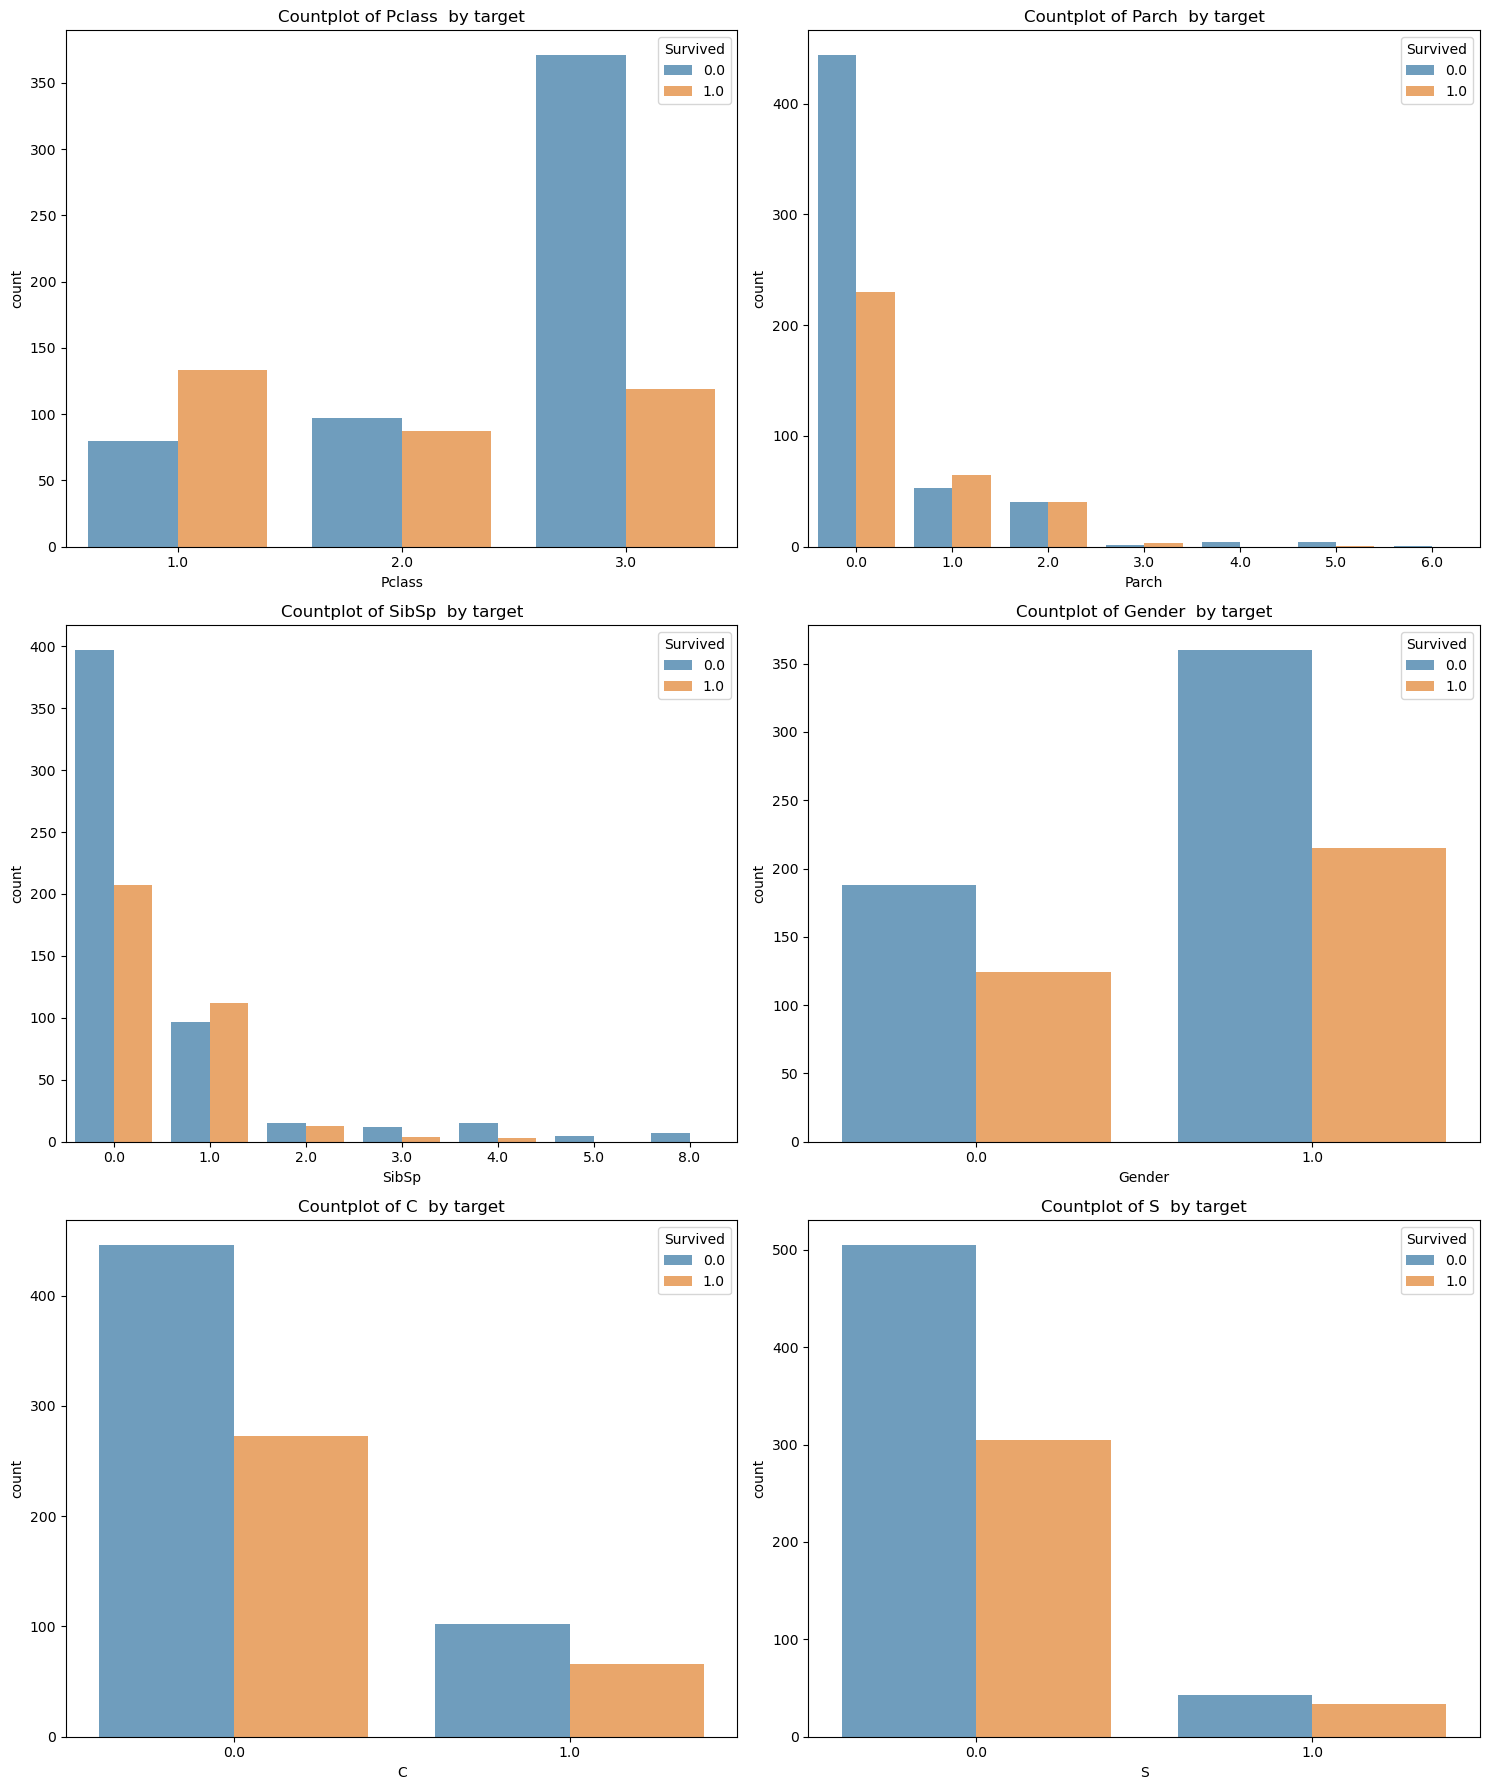

In [104]:
plt.figure(figsize=[15,18])

#Defining a list, in this case list of "features"
features = ["Pclass","Parch","SibSp","Gender","C","S"]
n=1
for f in features:    # f can be replaced by other letter/string
    plt.subplot(3,2,n)   # Subplot concept is used to create multiple plots within one figure which is helpful for cross-comparison and analysis.
    sns.countplot(x=f, hue='Survived', alpha=0.7, data=data2)   #alpha is for saturation of the colour of the bars
    plt.title("Countplot of {}  by target".format(f))  # It is used to replce the {} with the value of the variable "f"
    n=n+1
plt.tight_layout()
plt.show()

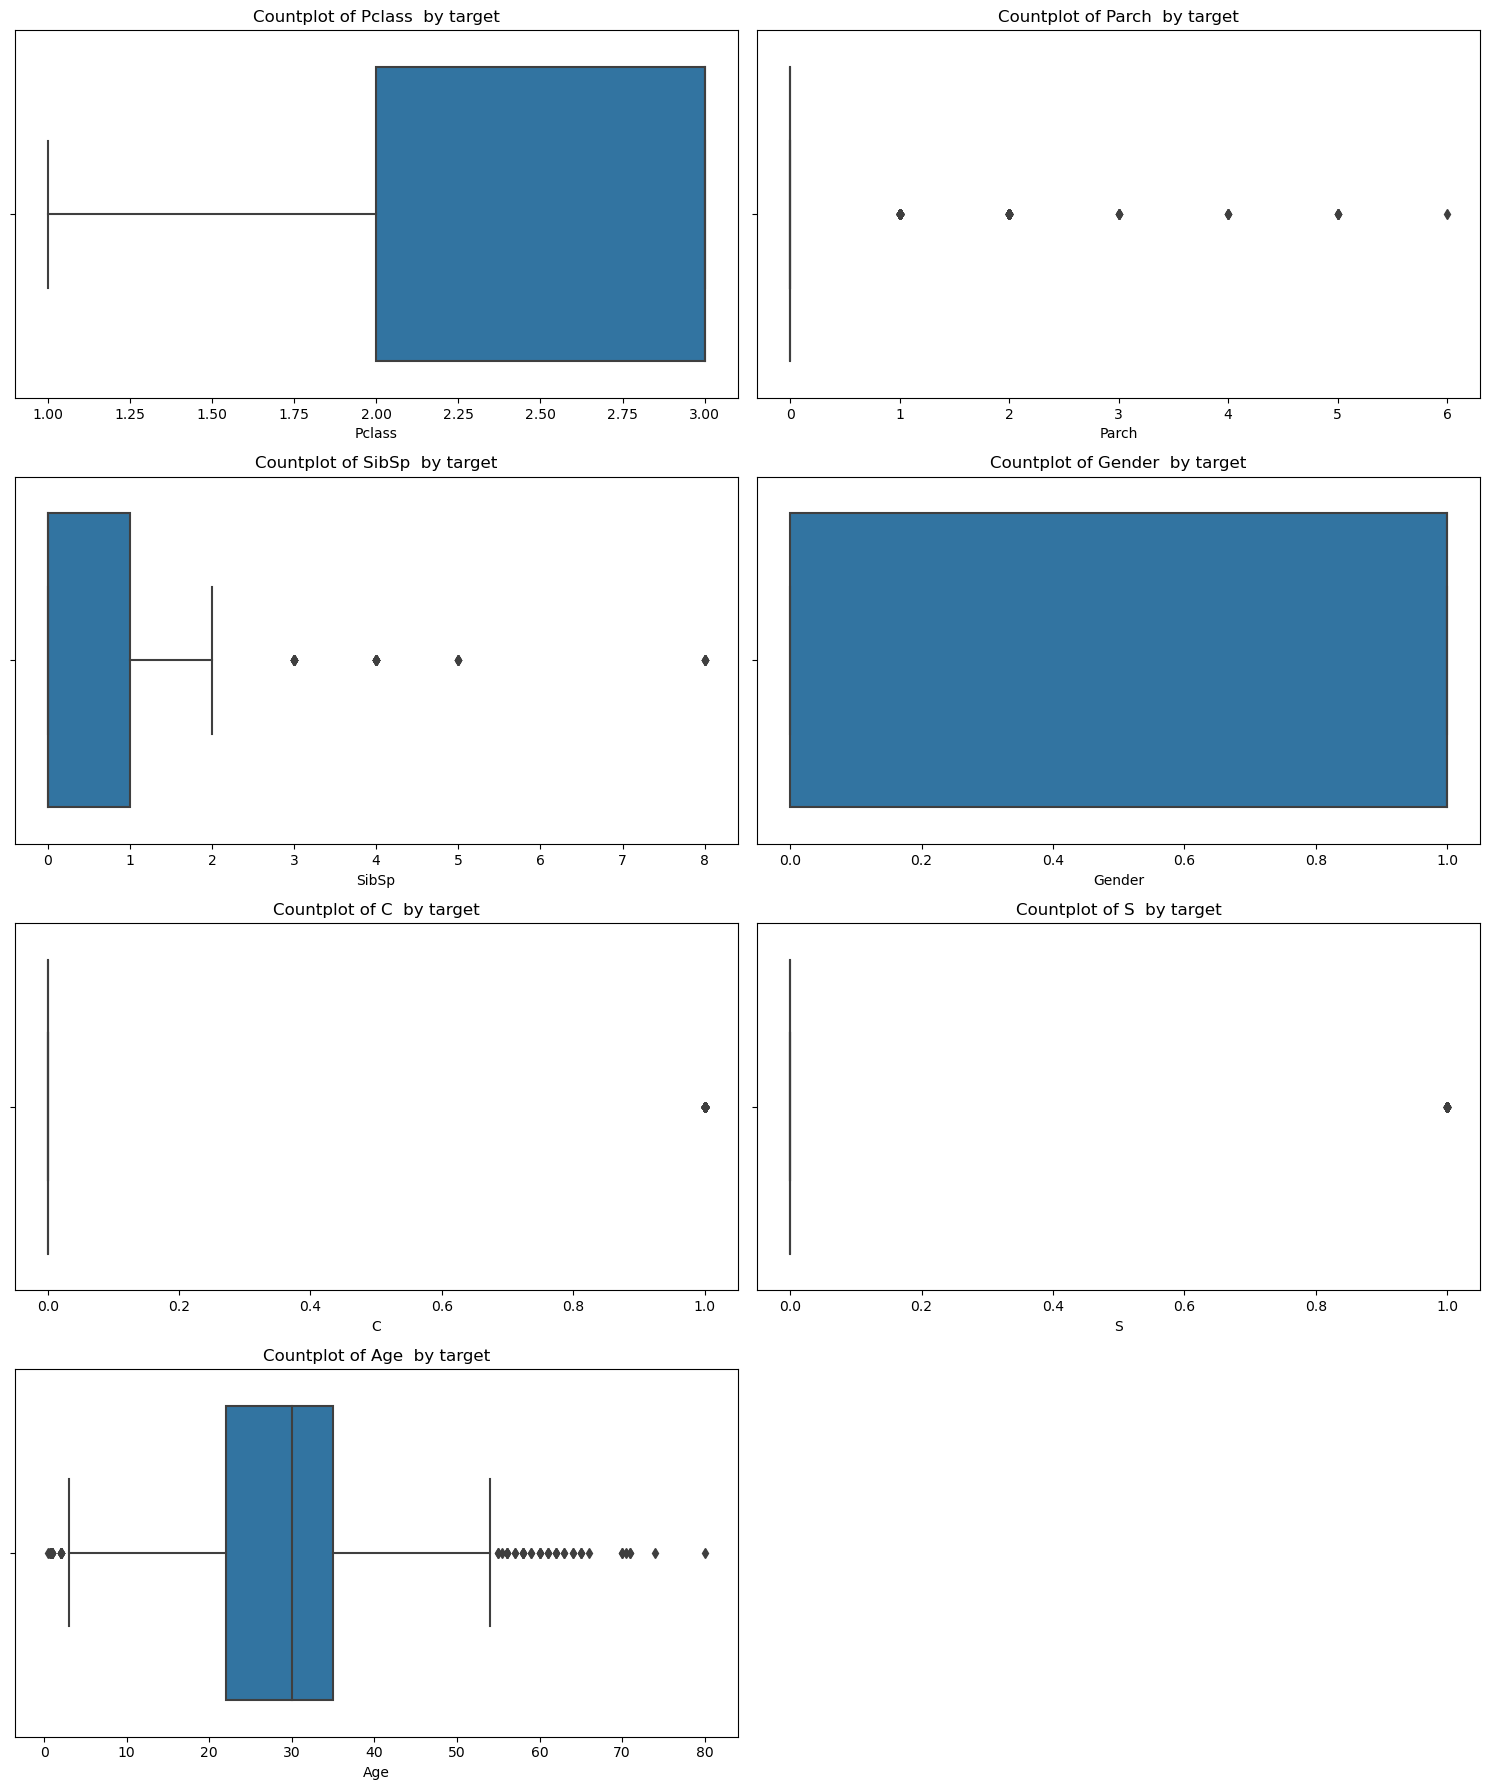

In [105]:
plt.figure(figsize=[15,18])

#Defining a list, in this case list of "features"
features = ["Pclass","Parch","SibSp","Gender","C","S","Age"]
n=1
for f in features:    # f can be replaced by other letter/string
    plt.subplot(4,2,n)   # Subplot concept is used to create multiple plots within one figure which is helpful for cross-comparison and analysis.
    sns.boxplot(x=f, hue='Survived', data=data2)   #alpha is for saturation of the colour of the bars
    plt.title("Countplot of {}  by target".format(f))  # It is used to replce the {} with the value of the variable "f"
    n=n+1
plt.tight_layout()
plt.show()

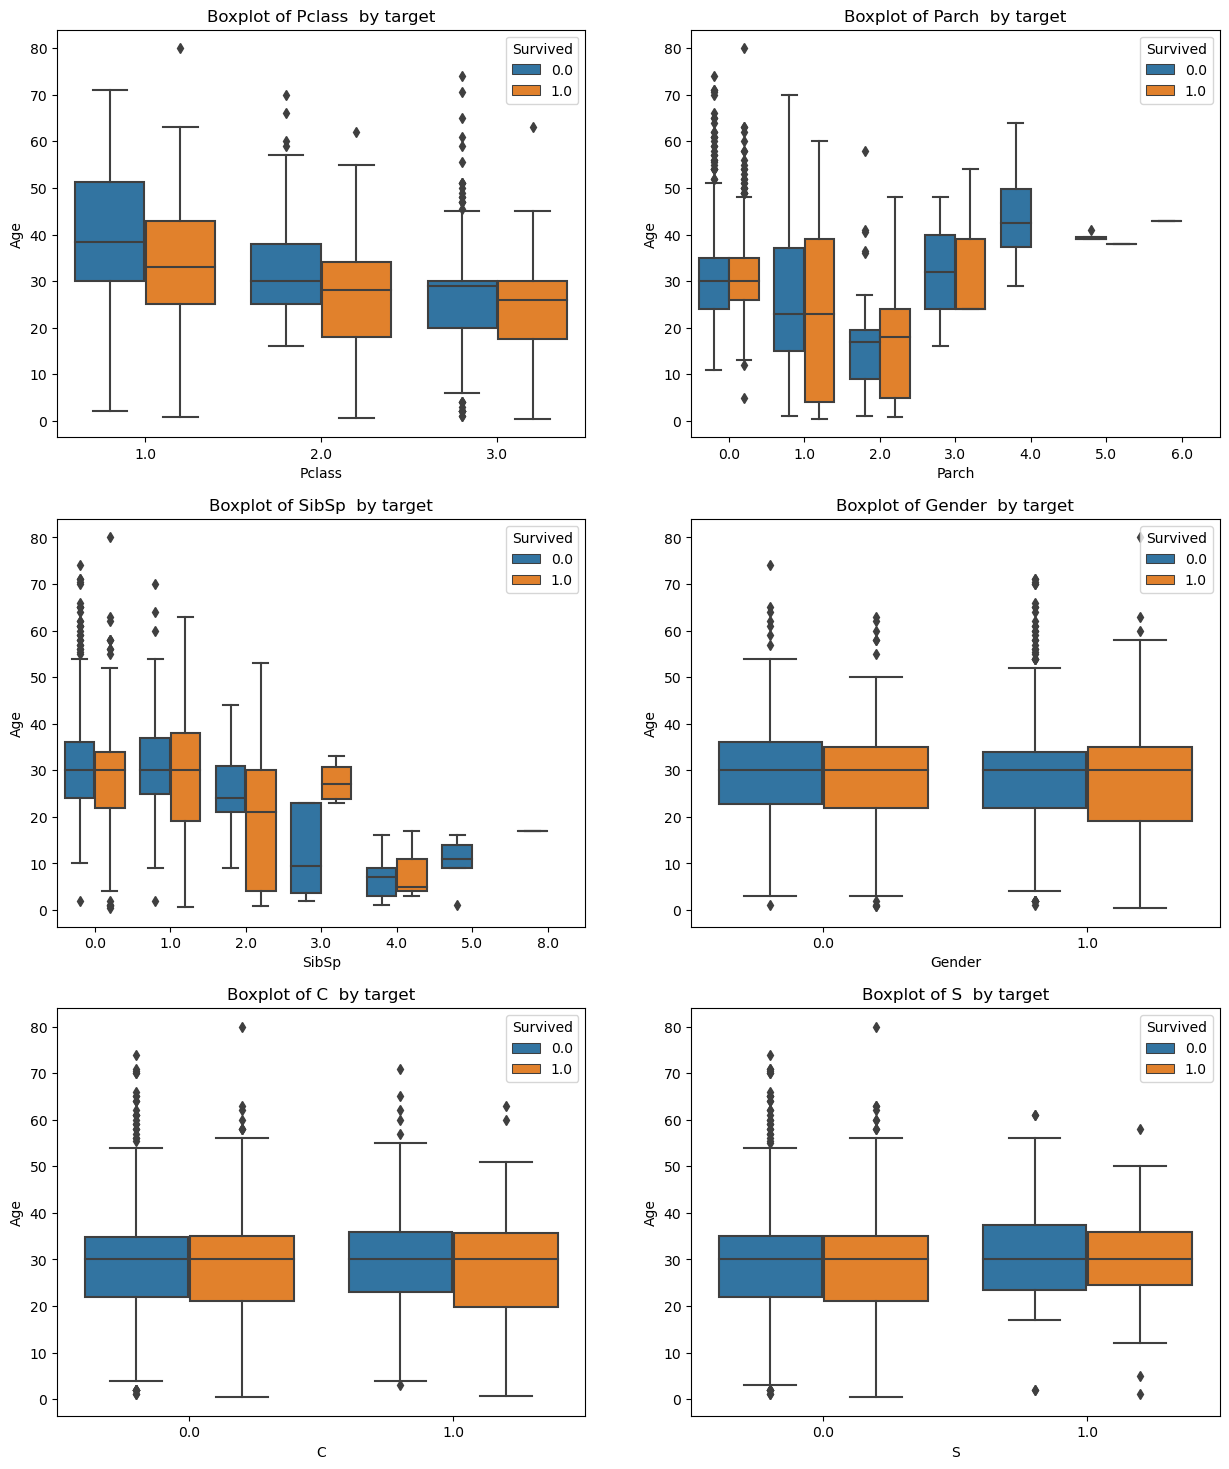

In [106]:
# W.r.t. to target variable "Survived", how "Age" is distributed across all categorical features of the dataset.
#This can be used to find which column can be correlated with "Age" in order to compute the missing values of "Age"

plt.figure(figsize=[15,18])

#Defining a list, in this case list of "features"
features = ["Pclass","Parch","SibSp","Gender","C","S"]
n=1
for f in features:    # f can be replaced by other letter/string
    plt.subplot(3,2,n)   # Subplot concept is used to create multiple plots within one figure which is helpful for cross-comparison and analysis.
    sns.boxplot(x=f, y="Age", hue='Survived', data=data2)   #alpha is for saturation of the colour of the bars. Added a continuous variable in "y axis".
    plt.title("Boxplot of {}  by target".format(f))  # It is used to replce the {} with the value of the variable "f"
    n=n+1
#plt.tight_layout()
#plt.show()